In [23]:
from matplotlib.image import imread

image = imread('/content/flower-meanings-red-lily-1671556462.jpg')
image.shape

(1414, 948, 3)

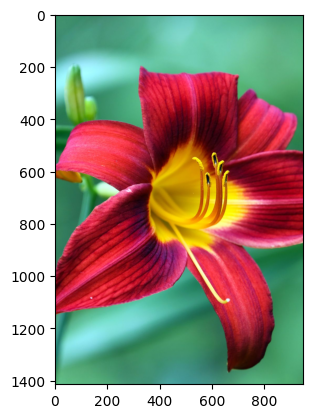

In [24]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()

In [26]:
import pandas as pd
r=[]
g=[]
b=[]

for i in image:
  for j in i:
    tem_r, tem_g, tem_b = j
    r.append(tem_r)
    g.append(tem_g)
    b.append(tem_b)

In [27]:
pixels = pd.DataFrame({'red':r, 'green':g, 'blue':b})

pixels.head()

,red,green,blue
0,56,138,102
1,56,138,102
2,56,138,102
3,56,138,102
4,56,138,102


In [28]:
pixels.shape

(1340472, 3)

In [29]:
from scipy.cluster.vq import kmeans, vq, whiten

In [30]:
df_scaled = whiten(pixels)
df_scaled = pd.DataFrame(df_scaled, columns=['scaled_red', 'scaled_blue', 'scaled_green'])

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

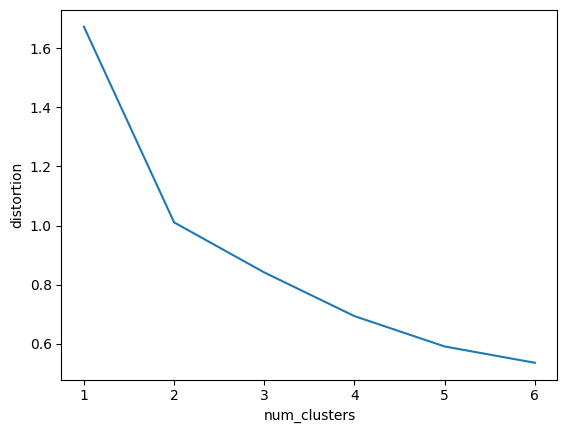

In [32]:
distortions = []

num_clusters = range(1,7)


for i in num_clusters:
  cluster_centers, distortion = kmeans(df_scaled[['scaled_red', 'scaled_blue', 'scaled_green']], i)
  distortions.append(distortion)

elbow_plot = pd.DataFrame({'num_clusters':num_clusters, 'distortion':distortions})

sns.lineplot(x= 'num_clusters', y= 'distortion', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()


In [33]:
cluster_centers, distortion = kmeans(df_scaled[['scaled_red', 'scaled_blue', 'scaled_green']], 2)

colors = []

r_std, g_std, b_std = pixels[['red', 'green', 'blue']].std()

for cluster_center in cluster_centers:
  scaled_r, scaled_g, scaled_b = cluster_center
  colors.append((
      scaled_r * r_std/255,
      scaled_g * g_std/255,
      scaled_b * b_std/255
  ))

In [34]:
print(colors)

[(0.3332707689220804, 0.654605683449968, 0.5154091127980638), (0.6892789038907203, 0.19879355738964383, 0.18986085460872812)]


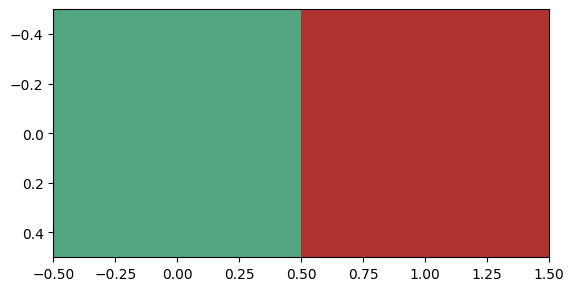

In [35]:
plt.imshow([colors])
plt.show()